https://www.kaggle.com/competitions/rossmann-store-sales

# 0.0 Imports

In [1]:
import math
import numpy as np
import pandas as pd
import inflection

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

In [2]:
def notebook_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

notebook_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.1 Helper Functions

### 0.2 Loading data

In [3]:
df_sales_raw = pd.read_csv("train.csv", low_memory=False)
df_store_raw = pd.read_csv("store.csv", low_memory=False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [4]:
df = df_raw.copy()

# 1.0 Descrição dos Dados

### 1.1 Rename Columns

In [5]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales',
            'Customers', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

df.columns = cols_new

In [7]:
df.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2 Data Dimensions

In [8]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Cols: {}".format(df.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


### 1.3 Data Types

In [9]:
df.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA

In [12]:
df. isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5 Fillout NA

In [13]:
# competition_distance
df['competition_distance'] = df['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)


# competition_open_since_month
df['competition_open_since_month'] = df.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)


# competition_open_since_year
df['competition_open_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


# promo2_since_week
df['promo2_since_week'] = df.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)


# promo2_since_year
df['promo2_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', }

df['promo_interval'].fillna(0, inplace = True)

df['month_map'] = df['date'].dt.month.map(month_map)

df['is_promo'] = df[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

C:\Users\Daniel Baesso\AppData\Local\Temp\ipykernel_18776\2582235634.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['promo_interval'].fillna(0, inplace = True)


In [14]:
df.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
433776,827,7,2014-06-08,0,0,0,0,0,0,a,c,250.0,1.0,2005.0,0,23.0,2014.0,0,Jun,0
545799,235,4,2014-02-27,4215,423,1,0,0,0,a,a,5710.0,3.0,2012.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",Fev,0
982105,576,5,2013-02-01,6318,928,1,0,0,0,c,a,50.0,11.0,2006.0,0,5.0,2013.0,0,Fev,0
246442,854,7,2014-12-21,0,0,0,0,0,0,c,a,4770.0,12.0,2014.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Dec,0
209952,333,6,2015-01-24,6514,887,1,0,0,0,a,c,3720.0,2.0,2010.0,0,4.0,2015.0,0,Jan,0


In [15]:
df.sample(5).T

,7762,979940,397568,639493,753373
store,1073,641,441,269,419
day_of_week,6,7,6,4,7
date,2015-07-25 00:00:00,2013-02-03 00:00:00,2014-07-12 00:00:00,2013-12-05 00:00:00,2013-08-25 00:00:00
sales,4844,0,6602,12808,0
customers,628,0,770,1428,0
open,1,0,1,1,0
promo,0,0,0,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,d,a,c


### 1.6 Change Types

In [16]:
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df['competition_open_since_month'] = df['competition_open_since_month'].astype(int)
df['competition_open_since_year'] = df['competition_open_since_year'].astype(int)

df['promo_since_week'] = df['promo2_since_week'].astype(int)
df['promo_since_year'] = df['promo2_since_year'].astype(int)

### 1.7 Descriptive Statiscal

In [18]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.7.1 Numerical Attributes

In [19]:
# Central Tendency - mena, median
ct_mean = pd.DataFrame(num_attibutes.apply(np.mean)).T
ct_median = pd.DataFrame(num_attibutes.apply(np.median)).T

# Dispersion - std, min, man, range, skew, kurtosis
dispersion_std = pd.DataFrame(num_attibutes.apply(np.std)).T
dispersion_min = pd.DataFrame(num_attibutes.apply(min)).T
dispersion_max = pd.DataFrame(num_attibutes.apply(max)).T
dispersion_range = pd.DataFrame(num_attibutes.apply(lambda x: x.max() - x.min())).T
dispersion_skew = pd.DataFrame(num_attibutes.apply(lambda x: x.skew())).T
dispersion_kurtosis = pd.DataFrame(num_attibutes.apply(lambda x: x.kurtosis())).T

m = pd.concat([dispersion_min, dispersion_max, dispersion_range, ct_mean, ct_median, dispersion_std, dispersion_skew, dispersion_kurtosis]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


NameError: name 'num_attibutes' is not defined

In [ ]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,promo2_since_week,1.0,52.0,51.0,23.619033,22.0,14.310057,0.178723,-1.184046


C:\Users\Daniel Baesso\AppData\Local\Temp\ipykernel_18676\1466740702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

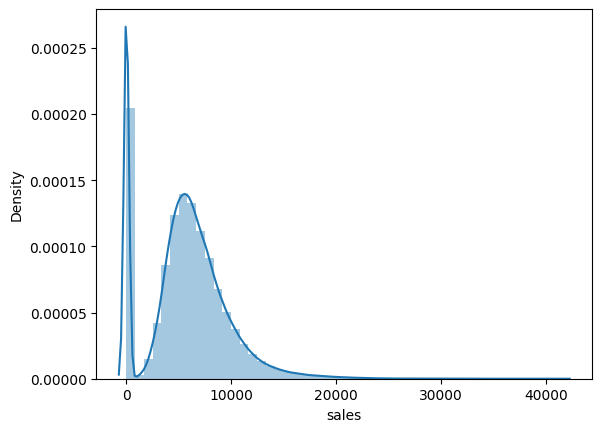

In [ ]:
sns.distplot(df['sales'])

### 1.7.2. Categorical Attributes

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo_interval                   4
month_map                       12
promo_since_week                52
promo_since_year                 7
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

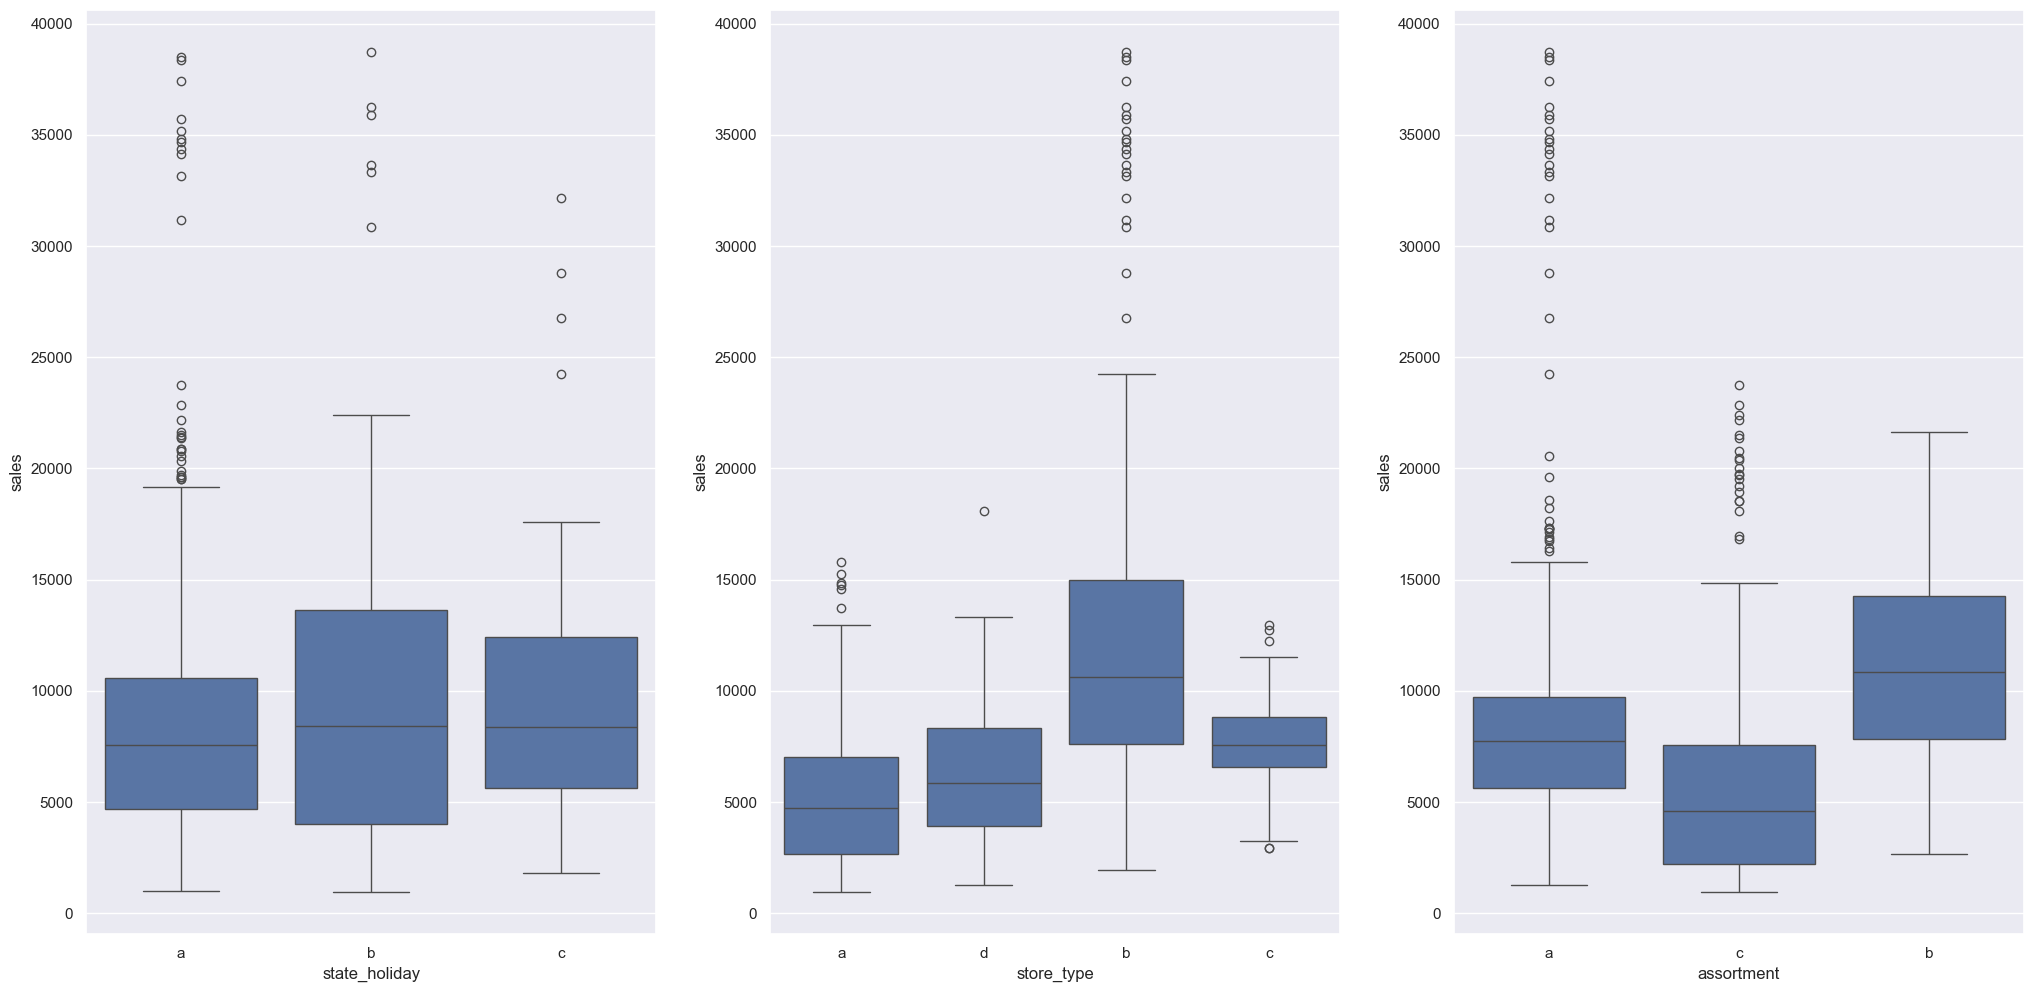

In [ ]:
aux = df[(df['state_holiday'] != '0') & (df['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux)

In [ ]:
|

# 2.0 Feature Engineering

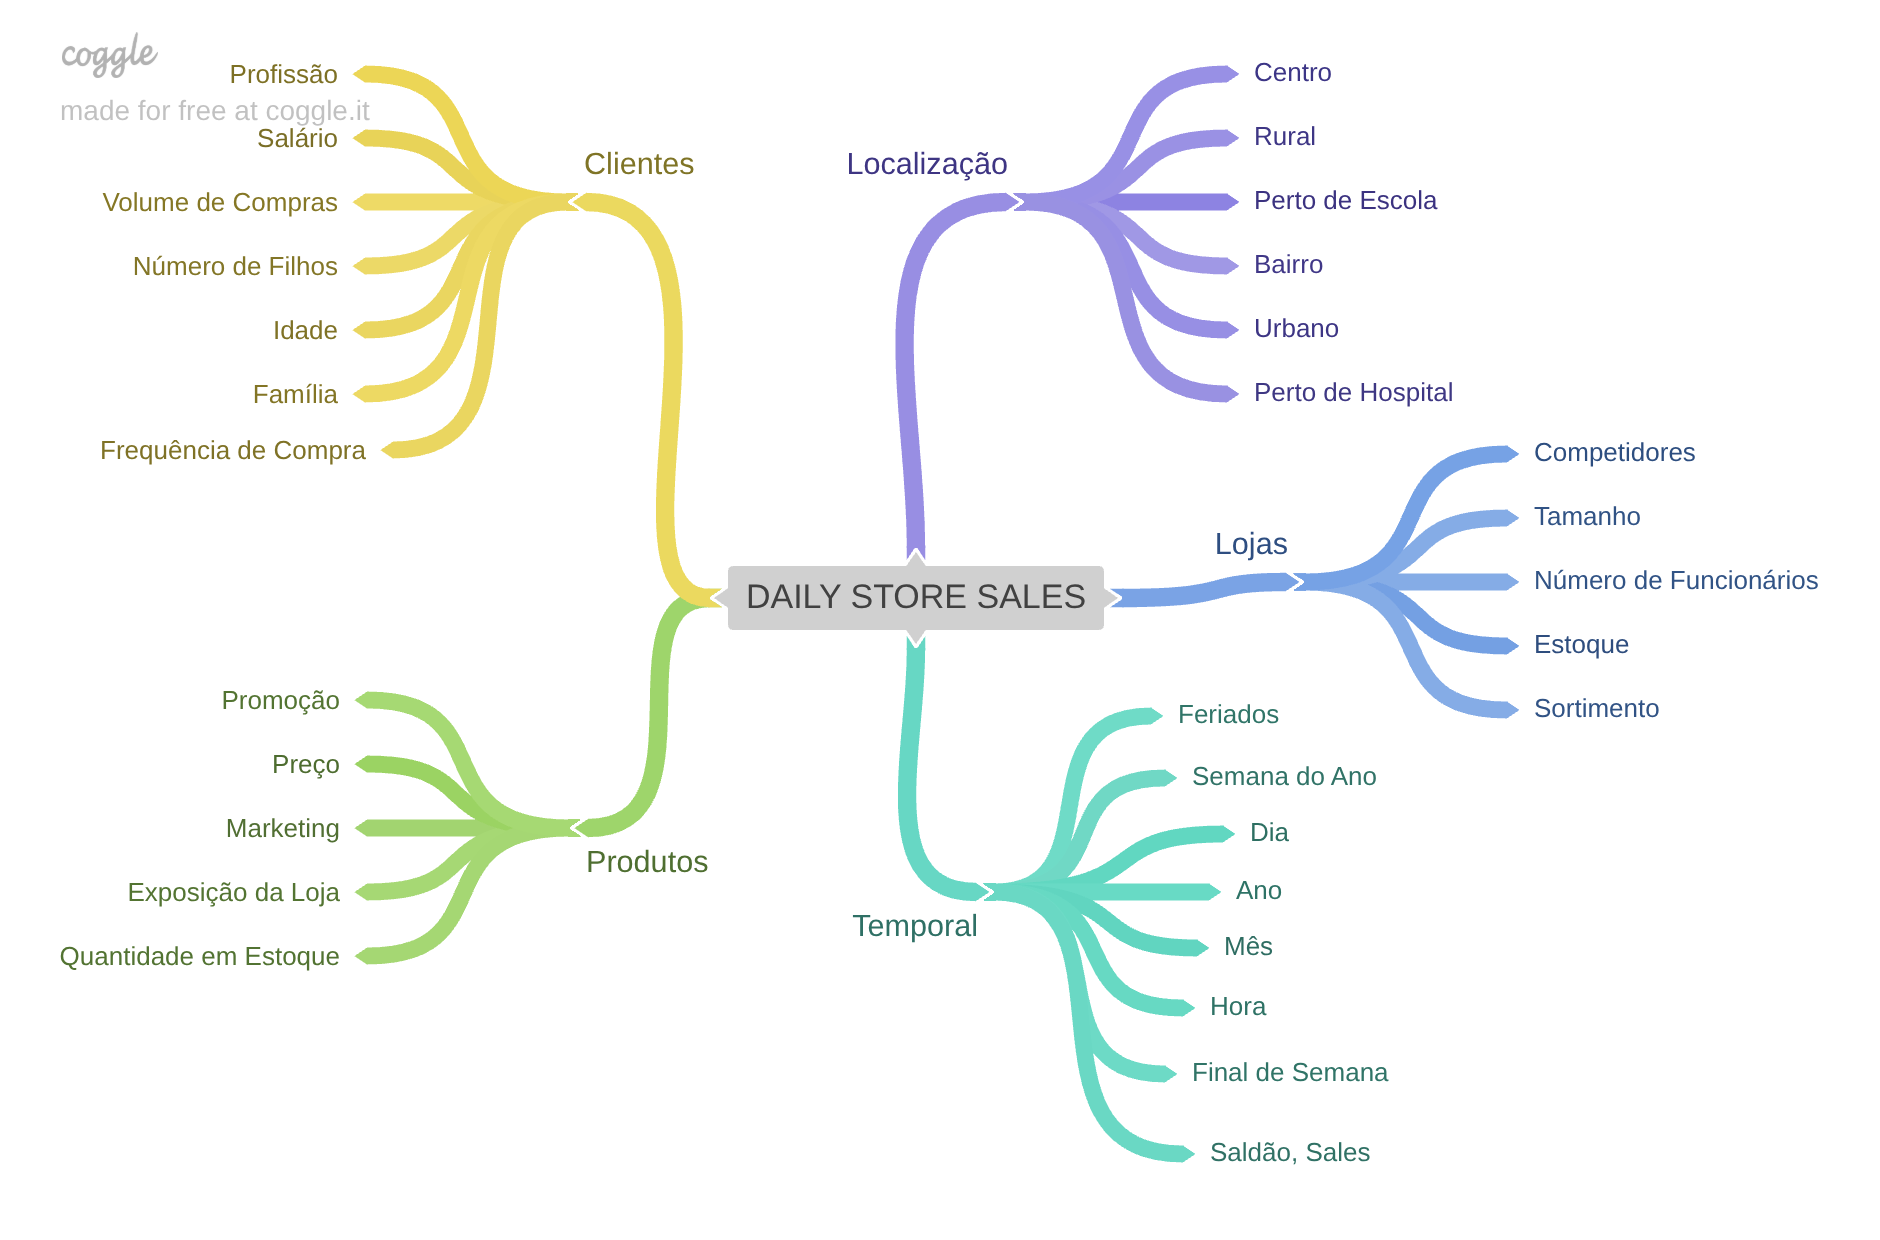

In [ ]:
Image('img/mind_map_hypothesis.png')

### 2.1 Hipóteses

##### 2.1.1 Hipóteses para Lojas

**1.** Lojas com maior quadro de funcionários devem vender mais.

**2.** Lojas com maior estoque devem vender mais.

**3.** Lojas com maior porte devem vender mais.

**4.** Lojas com maior sortimento devem vender mais.

**5.** Lojas com competidores próximos devem vender menos.

**6.** Lojas com competidores à mais tempo devem vender mais.

##### 2.1.2 Hipóteses para Produto

**1.** Lojas que investem mais em Marketing devem vender mais.

**2.** Lojas que expõe mais o proidutos nas vitrines deveriam vender mais.

**3.** Lojas que tem preços menores nos produtos devem vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

##### 2.1.3 Hipóteses para o Tempo

**1.** Lojas abertas durante o feriado de Natal devem vender mais.

**2.** Lojas devem vender mais ao longo do ano.

**3.** Lojas devem vender masi no segundo semestre do ano.

**4.** Lojas devem vender masi depois do dia 10 de cada mês

**5.** Lojas devem vender menos aos finais de semana.

**6.** Lojas devem vender menos durante os feriados escolares.

### 2.2 Hipóteses Finais

**1.** Lojas com maior sortimento devem vender mais.

**2.** Lojas com competidores próximos devem vender menos.

**3.** Lojas com competidores à mais tempo devem vender mais.


**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.


**7.** Lojas abertas durante o feriado de Natal devem vender mais.

**8.** Lojas devem vender mais ao longo do ano.

**9.** Lojas devem vender masi no segundo semestre do ano.

**10.** Lojas devem vender masi depois do dia 10 de cada mês

**11.** Lojas devem vender menos aos finais de semana.

**12.** Lojas devem vender menos durante os feriados escolares.

### 2.3 Feature Engineering

In [ ]:
# year
df['year'] = df['date'].dt.year

# month
df['month'] = df['date'].dt.month

# day
df['day'] = df['date'].dt.day

# week of year
df['week_of_year'] = df['date'].dt.weekofyear

# year week
df['year_week'] = df['date'].dt.strftime('%Y-%W')


# competition since

# promo since


# assortment

# state holiday
